
# <span style="color:rgb(213,80,0)">**Case Study 2 : Train the stacked auto\-encoders for the classification of images.**</span>

## **Name : B Uday Kumar**
## **Pin : HU21CSEN0100964**

Neural networks with multiple hidden layers can be useful for solving classification problems with complex data, such as images. Each layer can learn features at a different level of abstraction. However, training neural networks with multiple hidden layers can be difficult in practice.


One way to effectively train a neural network with multiple layers is by training one layer at a time. You can achieve this by training a special type of network known as an autoencoder for each desired hidden layer.


This example shows you how to train a neural network with two hidden layers to classify digits in images. First you train the hidden layers individually in an unsupervised fashion using autoencoders. Then you train a final soft max layer, and join the layers together to form a stacked network, which you train one final time in a supervised fashion.


<u>**Step 1 : Data Set**</u>


In the first step, you gather the data that you'll use to train your neural network. This data could come from various sources and may need preprocessing before being fed into the network. Data preprocessing may involve tasks such as normalization, standardization, handling missing values, and splitting the data into training and testing sets. The quality and quantity of your data significantly impact the performance and generalization ability of your neural network. Therefore, it's crucial to ensure that your dataset is representative of the problem you're trying to solve and is large enough to capture its complexity without overfitting.


This example uses synthetic data throughout, for training and testing. The synthetic images have been generated by applying random affine transformations to digit images created using different fonts. Each digit image is 28\-by\-28 pixels, and there are 5,000 training examples. You can load the training data, and view some of the images.



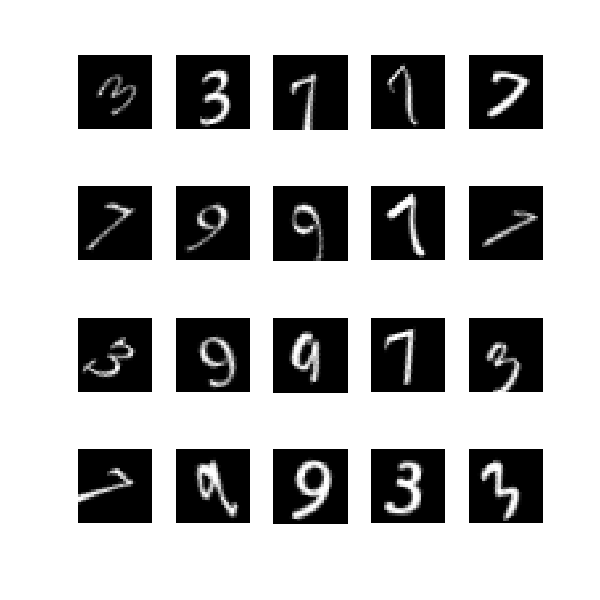

In [1]:
% Load the training data into memory
[xTrainImages,tTrain] = digitTrainCellArrayData;

% Display some of the training images
clf
for i = 1:20
    subplot(4,5,i);
    imshow(xTrainImages{i});
end


Neural networks have weights randomly initialized before training. Therefore the results from training are different each time. To avoid this behavior, explicitly


**set the random number generator seed**.


In [2]:
rng('default')


**Set the size of the hidden layer for the autoencoder**. For the autoencoder that you are going to train, it is a good idea to make this smaller than the input size.


In [3]:
hiddenSize1 = 100;


L2WeightRegularization should typically be quite small. SparsityRegularization controls the impact of a sparsity regularizer.


Note that this is different from applying a sparsity regularizer to the weights. Sparsity Proportion is a parameter of the sparsity regularizer.


It controls the sparsity of the output from the hidden layer. A low value for SparsityProportion usually leads to each neuron in the hidden layer "specializing" by only giving a high output for a small number of training examples.


For example, if SparsityProportion is set to 0.1, this is equivalent to saying that each neuron in the hidden layer should have an average output of 0.1 over the training examples.


This value must be between 0 and 1. The ideal value varies depending on the nature of the problem.


**Now train the autoencoder**, specifying the values for the regularizers that are described above.


In [4]:
autoenc1 = trainAutoencoder(xTrainImages,hiddenSize1, ...
    'MaxEpochs',400, ...
    'L2WeightRegularization',0.004, ...
    'SparsityRegularization',4, ...
    'SparsityProportion',0.15, ...
    'ScaleData', false);


**View Auto Encoder**


To view a diagram of the autoencoder use this command:



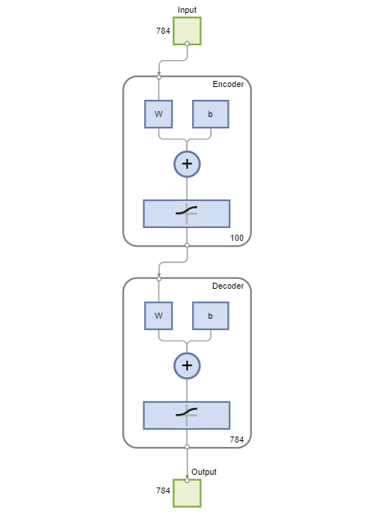

In [5]:
view(autoenc1)


<u>**Step 3:**</u><u> </u><u>**Visualizing the weights of the first autoencoder**</u>


After training the first autoencoder, it's essential to understand what features or patterns the model has learned. One way to gain insights into the learned representations is by visualizing the weights of the auto encoder's layers. Visualizing weights can provide valuable information about the structure and complexity of the learned features. Techniques such as plotting histograms, heat maps, or feature maps can reveal which parts of the input space are most important for the model's reconstruction task. This step helps in debugging the model, identifying over fitting or under fitting issues, and gaining intuition about the learned representations, which can guide further model development and optimization.


The mapping learned by the encoder part of an autoencoder can be useful for extracting features from data.


Each neuron in the encoder has a vector of weights associated with it which will be tuned to respond to a particular visual feature.


**You can view a representation of these features**.



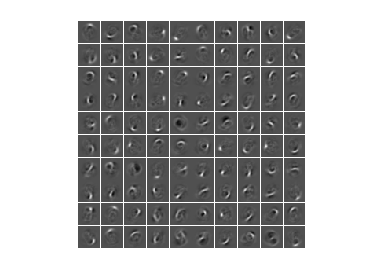

In [6]:
figure()
plotWeights(autoenc1);


The features learned by the autoencoder capture patterns like curls and strokes found in the digit images. The output from the hidden layer, which is 100\-dimensional, gives a condensed version of the input data. This compressed representation summarizes how the autoencoder responds to the visual features it has learned. To train the next autoencoder, we'll use these extracted feature vectors from the training data. Initially, we'll employ the encoder part of the trained autoencoder to generate these features.


In [7]:
feat1 = encode(autoenc1,xTrainImages);


<u>**Step 4:**</u><u> </u><u>**Visualizing Training the second autoencoder**</u>


After obtaining the compressed feature representations from the first autoencoder, the next step is to train a second autoencoder. This autoencoder follows a similar architecture as the first one, comprising an encoder and a decoder. However, this time, the input to the second autoencoder is the compressed feature vectors extracted from the training data using the encoder of the first autoencoder. By training the second autoencoder, the model learns to further compress and reconstruct these feature representations. During training, the second autoencoder adjusts its parameters to minimize the reconstruction error, aiming to reconstruct the original feature vectors as accurately as possible. This step is crucial for refining the learned representations and capturing more abstract and higher\-level features present in the data.


After training the first autoencoder, you train the second autoencoder in a similar way. The main difference is that you use the features that were generated from the first autoencoder as the training data in the second autoencoder. Also, you decrease the size of the hidden representation to 50, so that the encoder in the second autoencoder learns an even smaller representation of the input data.


In [8]:
hiddenSize2 = 50;
autoenc2 = trainAutoencoder(feat1,hiddenSize2, ...
    'MaxEpochs',100, ...
    'L2WeightRegularization',0.002, ...
    'SparsityRegularization',4, ...
    'SparsityProportion',0.1, ...
    'ScaleData', false);


For the Re Verification Once again, you can view a diagram of the autoencoder with the view function



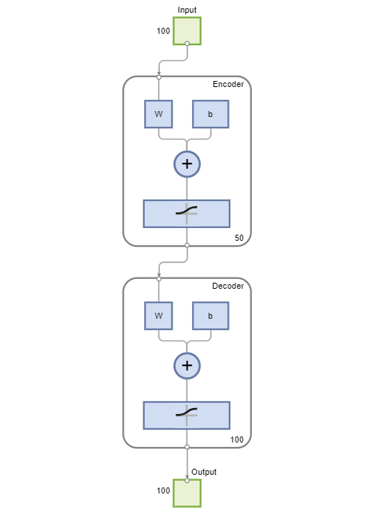


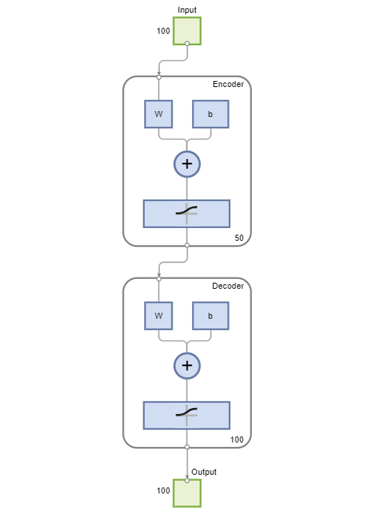

In [9]:
view(autoenc2)


Another set of features can be derived by running the previous set through the encoder of the second autoencoder.


In [10]:
feat2 = encode(autoenc2,feat1);


The initial vectors in the training dataset had 784 dimensions. Following their transformation through the first encoder, this dimensionality was reduced to 100. Subsequently, utilizing the second encoder further reduced this dimensionality to 50. Now, the opportunity arises to train a concluding layer aimed at classifying these 50\-dimensional vectors into distinct digit classes.


<u>**Step 5:**</u><u> </u><u>**Training the Final Soft Max Layer**</u>


Once the second autoencoder is trained, the next step is to add a final softmax layer on top of the stacked autoencoder architecture. The softmax layer is a common choice for multiclass classification tasks. It takes the output of the stacked autoencoder, which represents the compressed and refined features, and applies the softmax function to compute the probabilities of the input belonging to each class. During training, the parameters of the softmax layer are optimized using techniques like gradient descent to minimize the categorical cross\-entropy loss between the predicted probabilities and the true labels. This step essentially transforms the learned features into class probabilities, enabling the model to make predictions on new unseen data.


Train a softmax layer to categorize the 50\-dimensional feature vectors. In contrast to the autoencoders, this training process for the softmax layer is supervised, utilizing labeled data from the training dataset.


In [11]:
softnet = trainSoftmaxLayer(feat2,tTrain,'MaxEpochs',400);


<u>**Step 6:**</u><u> </u><u>**Forming a stacked neural network**</u>


With the second autoencoder trained and the final softmax layer added, the next step is to form a stacked neural network by combining these components. The stacked neural network consists of the encoder part of the first autoencoder, followed by the encoder of the second autoencoder, and finally, the softmax layer. This architecture forms a hierarchical feature extractor, where the first autoencoder learns basic features, the second autoencoder learns more abstract features based on the compressed representations from the first autoencoder, and the softmax layer performs classification based on these learned features. Training the stacked neural network involves fine\-tuning the entire model using back propagation with techniques such as stochastic gradient descent (SGD) or Adam optimization. Fine\-tuning ensures that all components of the stacked neural network work together effectively to achieve the desired classification performance.


You have trained three separate components of a stacked neural network in isolation. At this point, it might be useful to view the three neural networks that you have trained. They are autoenc1, autoenc2, and softnet



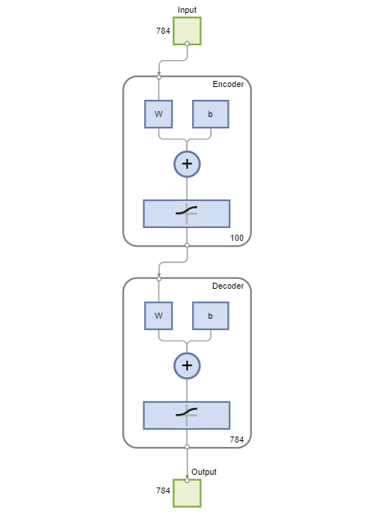

In [12]:
view(autoenc1)


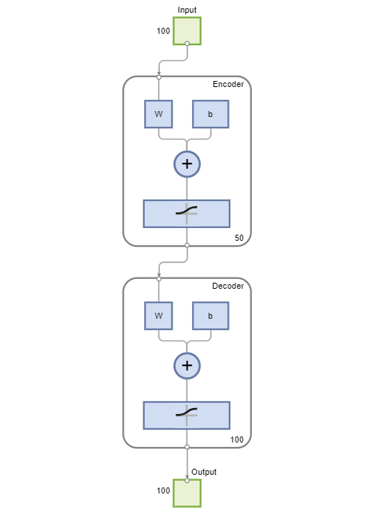


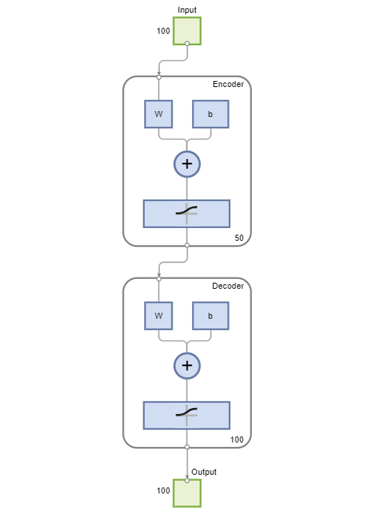

In [13]:
view(autoenc2)


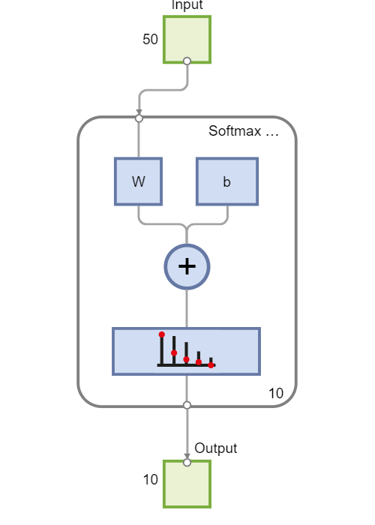

In [14]:
view(softnet)


As previously described, the encoders from the autoencoders have been employed to extract features. Combining the encoders from the autoencoders with the softmax layer forms a stacked network for classification. This amalgamation is achieved by stacking the encoders from the autoencoders along with the softmax layer. To visualize the architecture of the stacked network, you can utilize the view function. The resultant network comprises the encoders from the autoencoders and the softmax layer.


In [15]:
stackednet = stack(autoenc1,autoenc2,softnet);


You can view a diagram of the stacked network with the <samp>view</samp> function. The network is formed by the encoders from the autoencoders and the softmax layer.



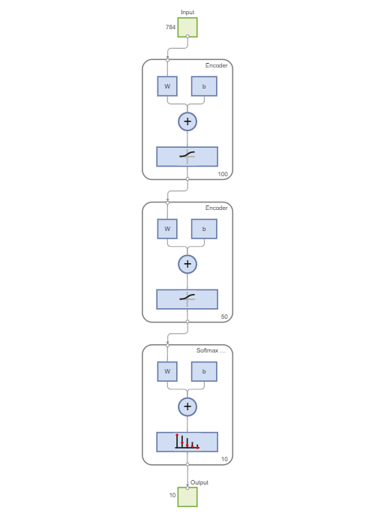

In [16]:
view(stackednet)


Get the number of pixels in each image


Now that the entire network is assembled, you can evaluate its performance on the test set. However, before utilizing the images with the stacked network, it's necessary to reshape the test images into a matrix format. This can be accomplished by arranging the columns of an image into a vector, and then constructing a matrix from these vectors.


In [17]:
imageWidth = 28;
imageHeight = 28;
inputSize = imageWidth*imageHeight;

% Load the test images
[xTestImages,tTest] = digitTestCellArrayData;

% Turn the test images into vectors and put them in a matrix
xTest = zeros(inputSize,numel(xTestImages));
for i = 1:numel(xTestImages)
    xTest(:,i) = xTestImages{i}(:);
end


You can visualize the results with a confusion matrix. The numbers in the bottom right\-hand square of the matrix give the overall accuracy.



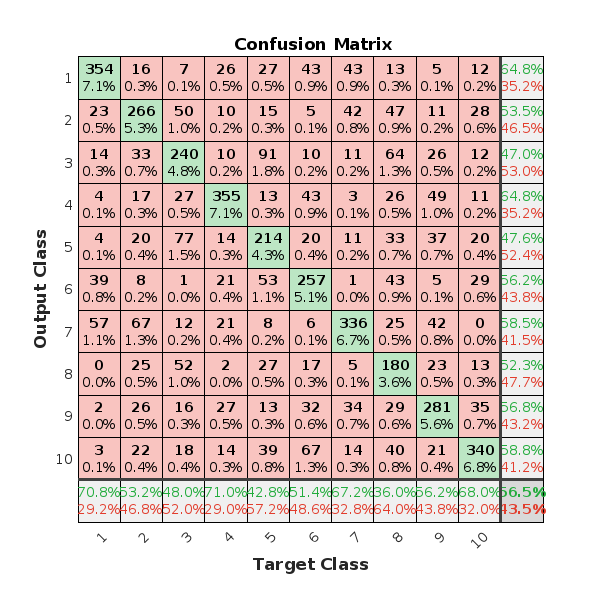

In [18]:
y = stackednet(xTest);
plotconfusion(tTest,y);


<u>**Step 7:**</u><u> </u><u>**Fine\-Tuning the Stacked Neural Network**</u>


Fine\-tuning the stacked neural network involves adjusting the parameters of the entire model, including the encoders from the autoencoders and the softmax layer, to optimize its performance on the task at hand, which in this case is digit classification. This step is crucial for refining the learned representations and improving the overall accuracy of the model. Fine\-tuning typically involves using techniques like back propagation with adaptive optimization algorithms such as stochastic gradient descent (SGD) or Adam to update the weights and biases of the network. During fine\-tuning, the model learns to better discriminate between different digit classes by iteratively adjusting its parameters based on the gradients of the loss function with respect to these parameters.


The results for the stacked neural network can be improved by performing backpropagation on the whole multilayer network. This process is often referred to as fine tuning.


You fine tune the network by retraining it on the training data in a supervised fashion. Before you can do this, you have to reshape the training images into a matrix, as was done for the test images.


In [19]:
xTrain = zeros(inputSize,numel(xTrainImages));
for i = 1:numel(xTrainImages)
    xTrain(:,i) = xTrainImages{i}(:);
end

% Perform fine tuning
stackednet = train(stackednet,xTrain,tTrain);


You then view the results again using a confusion matrix.



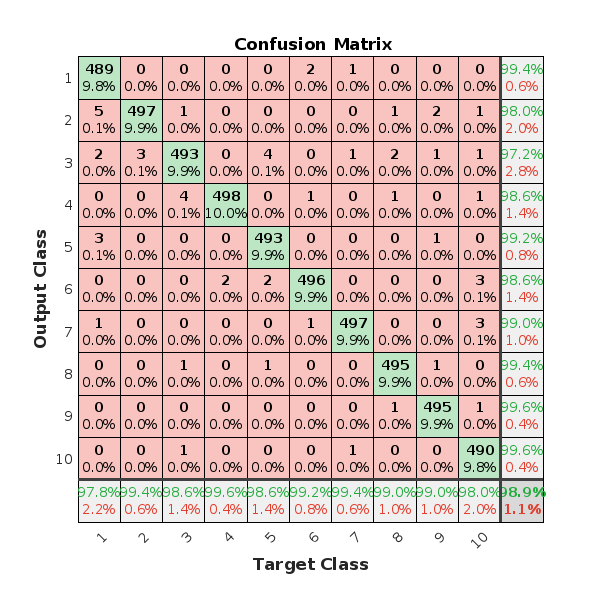

In [20]:
y = stackednet(xTest);
plotconfusion(tTest,y);


**Summary**


In summary, fine\-tuning the stacked neural network encompasses optimizing the entire model by adjusting its parameters to enhance its ability to classify digit images accurately.


This process leverages the learned representations from the autoencoders and the classification capabilities of the softmax layer to refine the model's performance.


By iteratively updating the weights and biases of the network using backpropagation and optimization algorithms, the model learns to better capture the underlying patterns and features in the data, ultimately leading to improved classification accuracy on both training and test datasets.

